In [1]:
%autosave 10
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400
from ipywidgets import interactive

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [4]:
df = pd.read_csv('cleaned_data.csv')

In [5]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [6]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month'].values

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred=model.predict(X_test)

In [20]:
model.score(X_test,y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [21]:
metrics.confusion_matrix(y_test, y_pred)


array([[4178,    0],
       [1155,    0]], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [10]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.74826949, 0.25173051],
       [0.5842971 , 0.4157029 ],
       [0.7960448 , 0.2039552 ],
       ...,
       [0.5842971 , 0.4157029 ],
       [0.82721525, 0.17278475],
       [0.66393453, 0.33606547]])

In [11]:
prob_sum = np.sum(y_pred_prob,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [12]:
prob_sum.shape


(5333,)

In [13]:
np.unique(prob_sum)

array([1.])

In [14]:
pos_prob = y_pred_prob[:,1]
pos_prob

array([0.25173051, 0.4157029 , 0.2039552 , ..., 0.4157029 , 0.17278475,
       0.33606547])

(array([280., 509., 414., 538., 587., 610., 412., 491., 782., 710.]),
 array([0.00644174, 0.05409603, 0.10175032, 0.14940461, 0.1970589 ,
        0.24471319, 0.29236748, 0.34002177, 0.38767606, 0.43533034,
        0.48298463]),
 <a list of 10 Patch objects>)

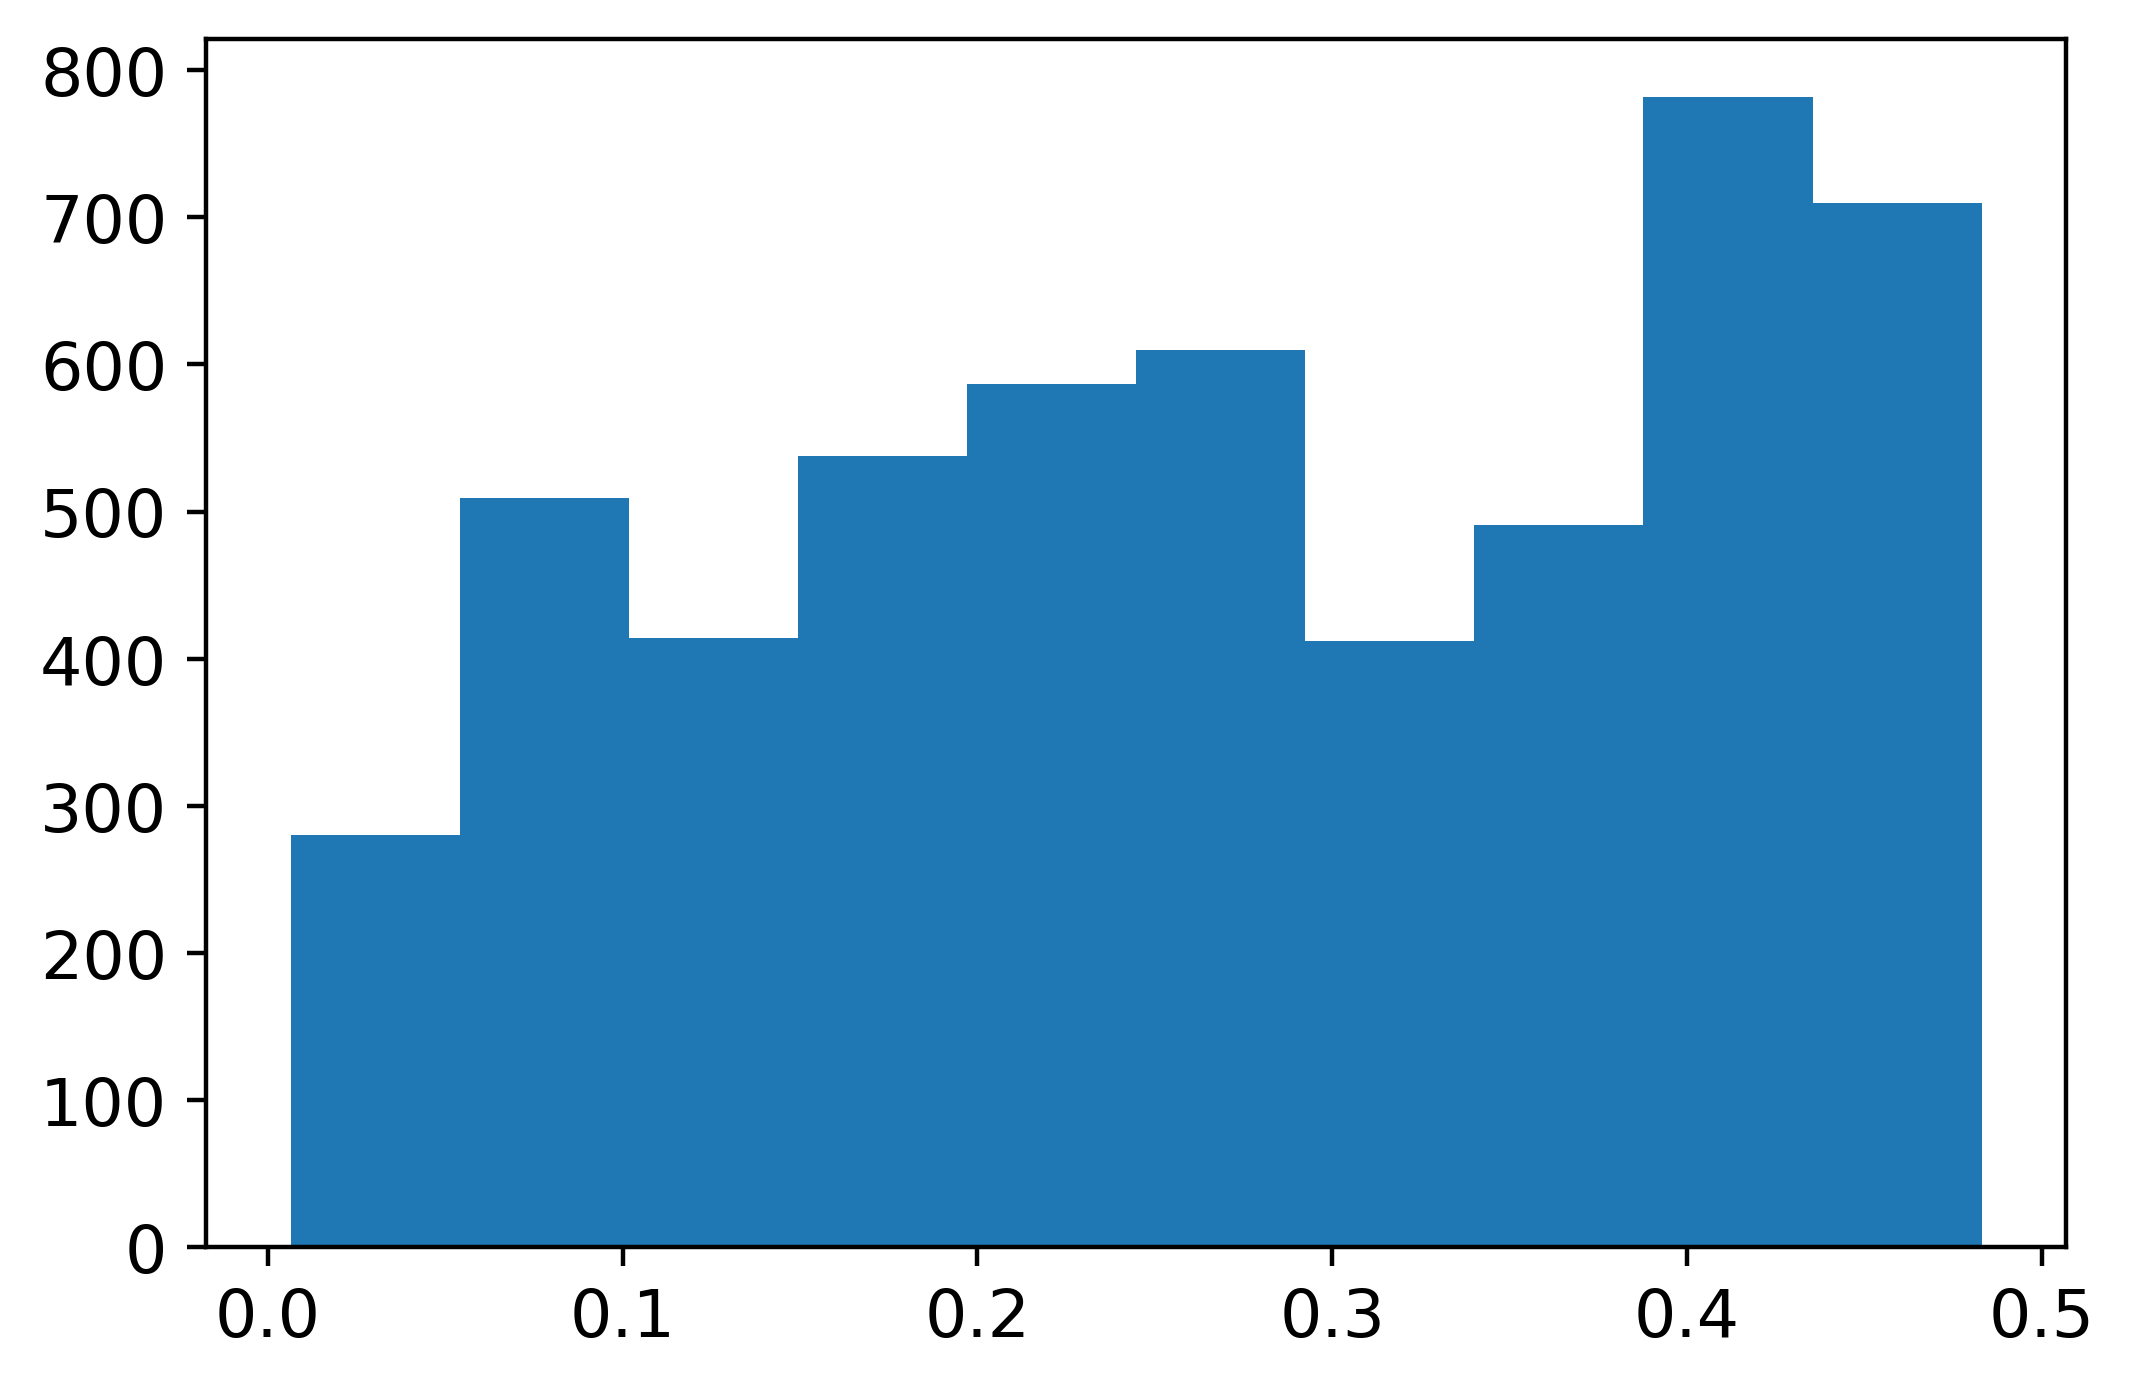

In [29]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_prob)

In [17]:
pos_sample_pos_prob = pos_prob[y_test==1]
neg_sample_pos_prob = pos_prob[y_test==0]

Text(0, 0.5, 'Number of samples')

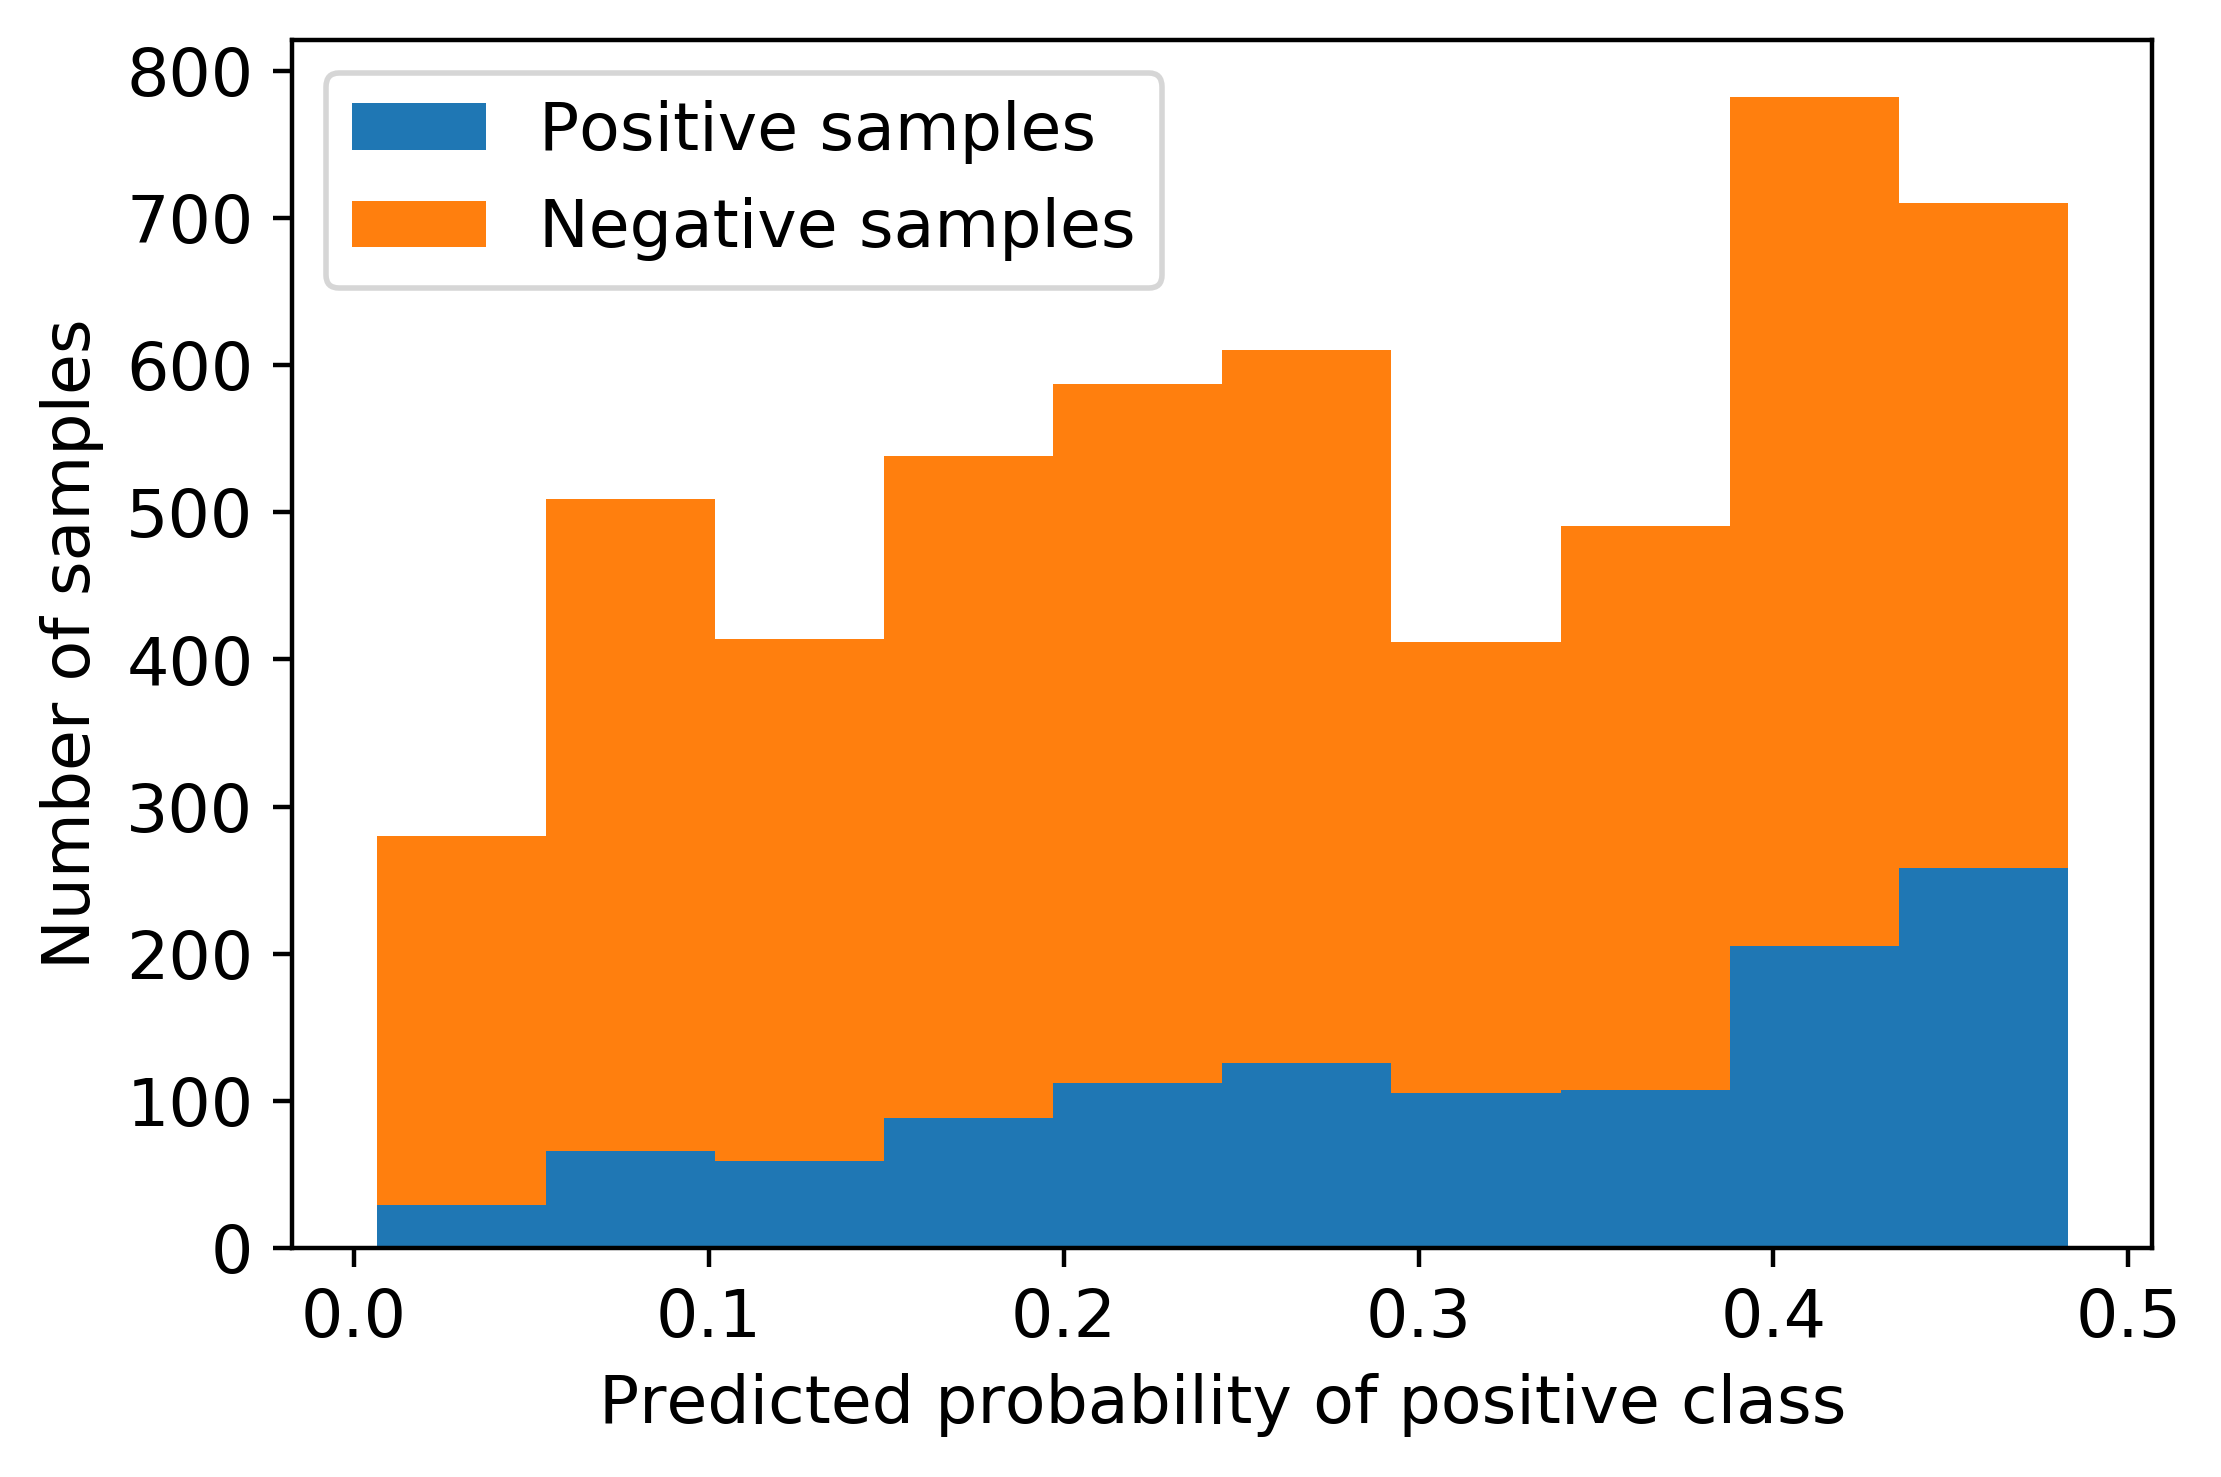

In [18]:
plt.hist([pos_sample_pos_prob, neg_sample_pos_prob], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_prob)
thresholds

array([1.48298463, 0.48298463, 0.46600863, 0.449111  , 0.43233001,
       0.4157029 , 0.39926548, 0.38305193, 0.36709445, 0.35142307,
       0.33606547, 0.3210468 , 0.30638957, 0.29211361, 0.27823599,
       0.26477108, 0.25173051, 0.23912333, 0.22695604, 0.21523272,
       0.2039552 , 0.19312317, 0.18273437, 0.17278475, 0.16326864,
       0.15417895, 0.14550731, 0.13724426, 0.1293794 , 0.12190156,
       0.11479893, 0.10805921, 0.10166973, 0.09561755, 0.0898896 ,
       0.08447273, 0.07935382, 0.07451986, 0.069958  , 0.06565559,
       0.06160024, 0.0577799 , 0.0541828 , 0.05079757, 0.0476132 ,
       0.04461906, 0.04180494, 0.03916104, 0.03667794, 0.03434666,
       0.03215862, 0.03010561, 0.02817986, 0.02637394, 0.02468081,
       0.0230938 , 0.02021314, 0.01890784, 0.01654049, 0.01546861,
       0.01446517, 0.0103345 , 0.00844129, 0.00789006, 0.00644174])

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

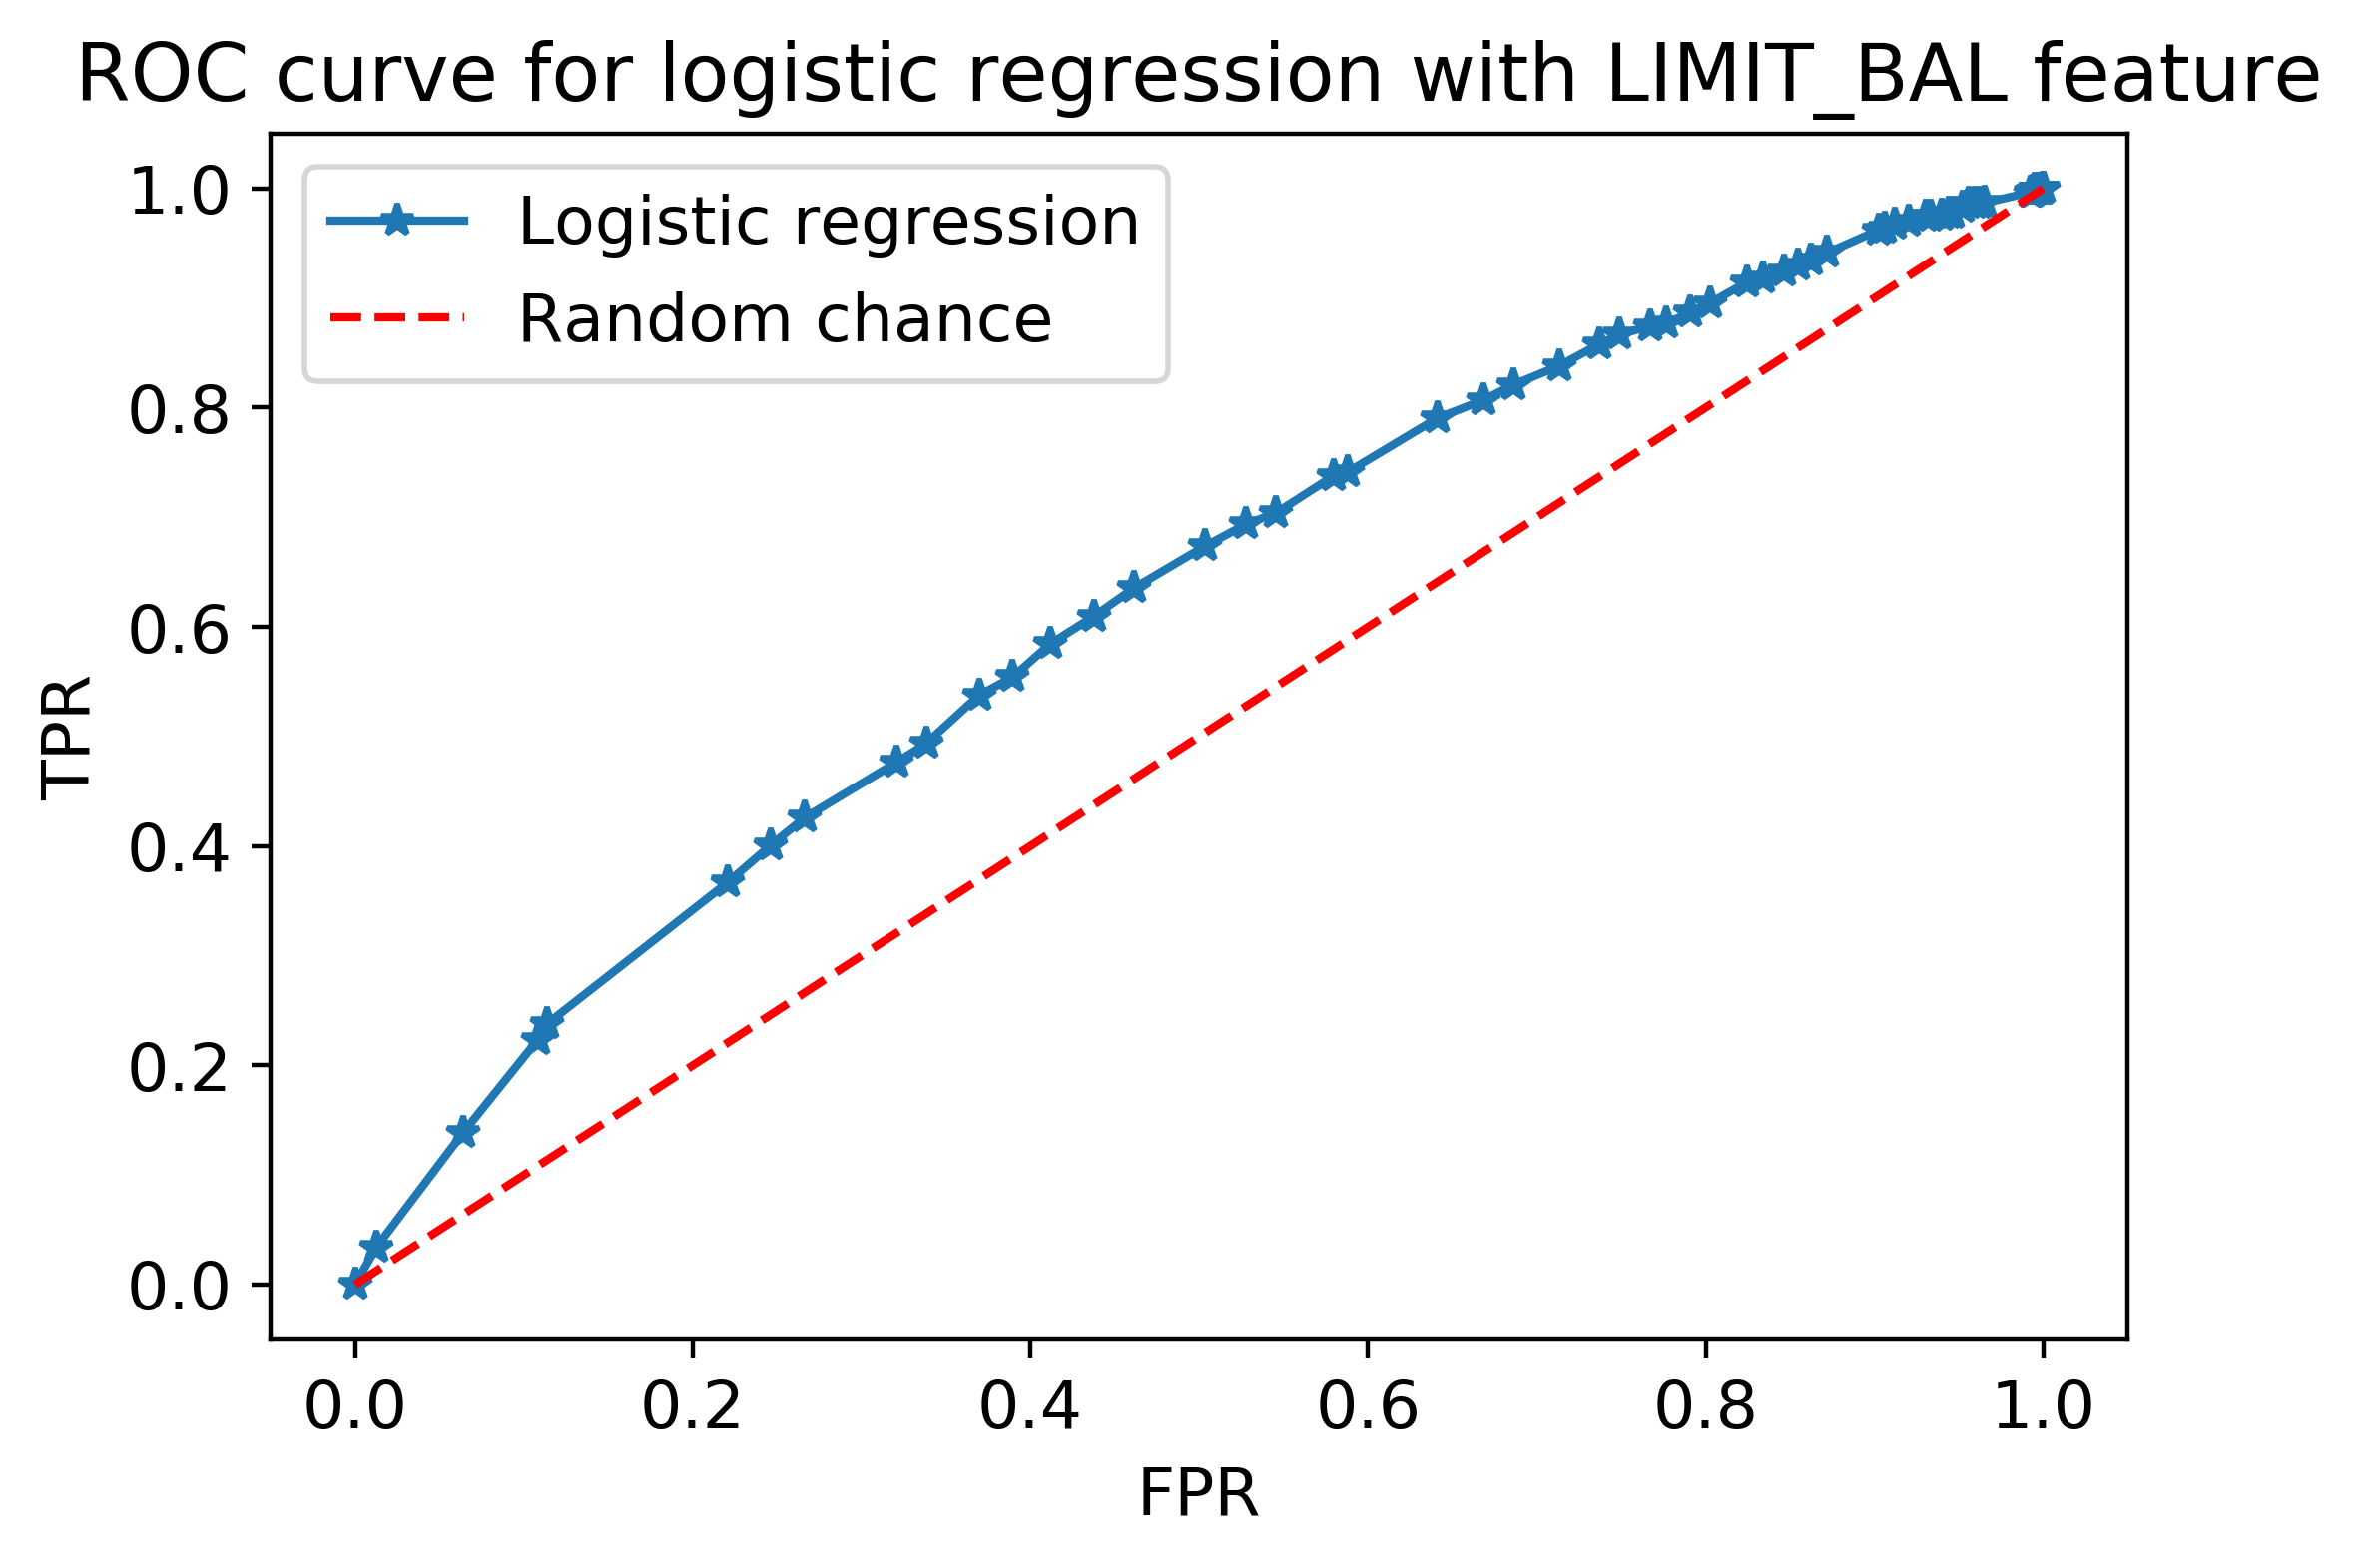

In [23]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [25]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test,pos_prob)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision-recall curve for limit_bal')

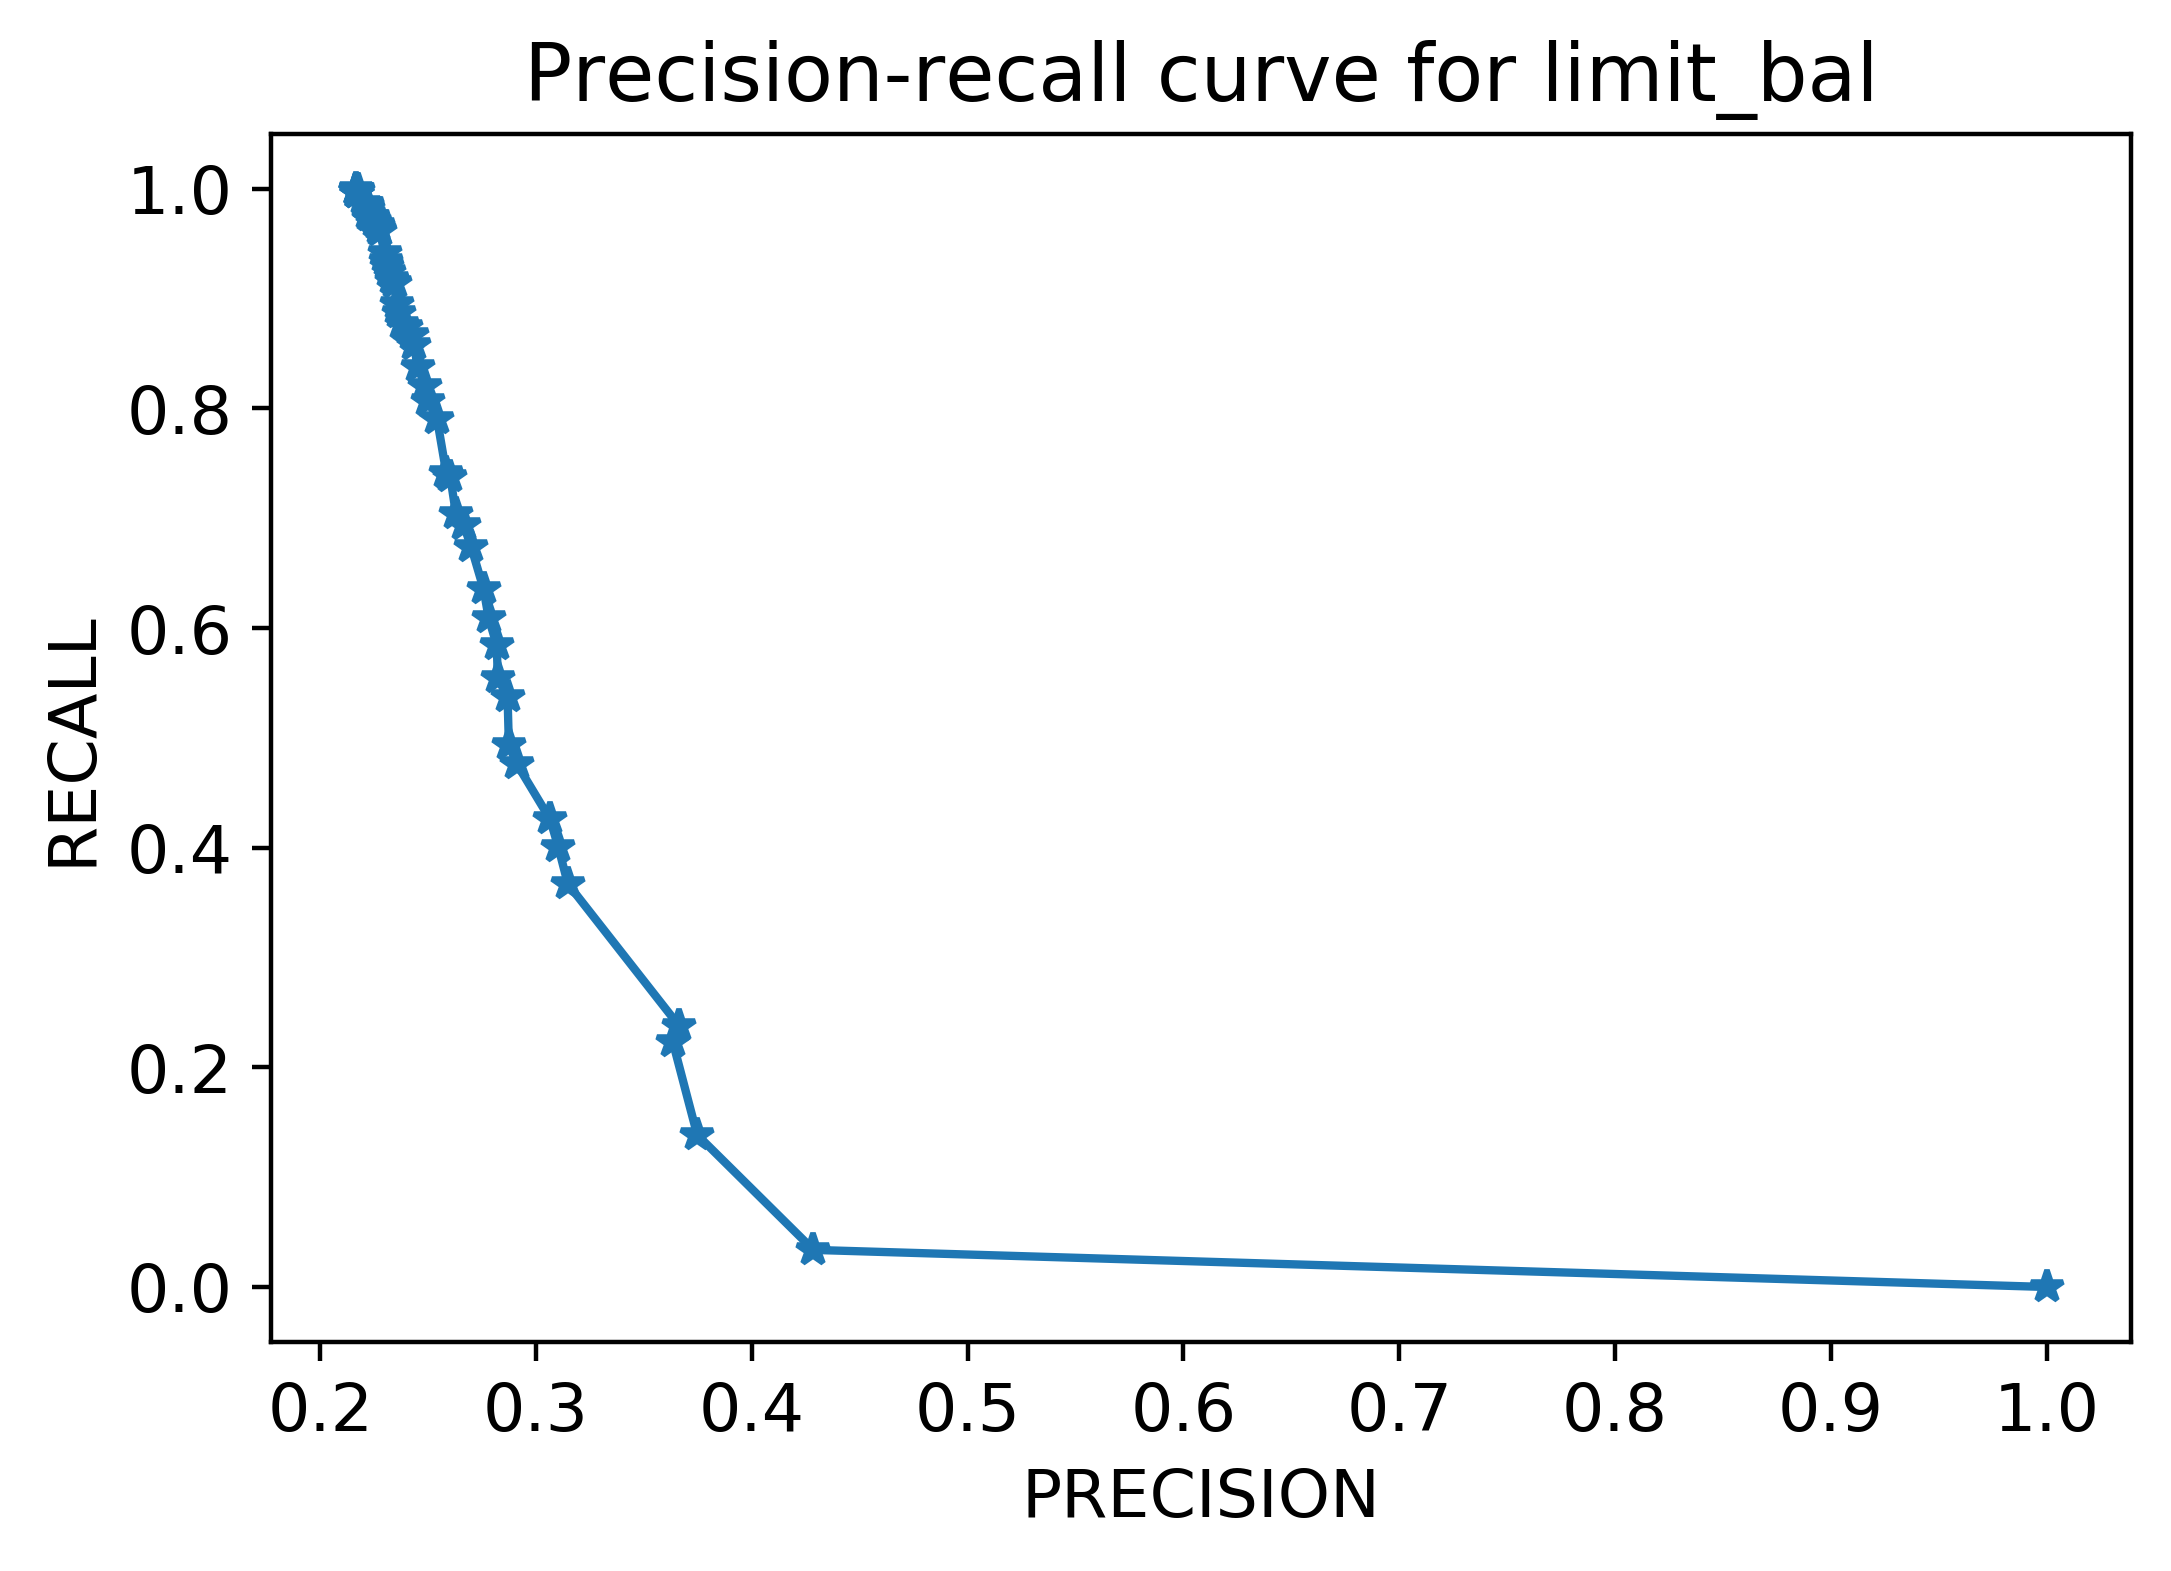

In [26]:
plt.plot(precision, recall, '*-')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve for limit_bal')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [27]:
metrics.auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [28]:
y_train_pred_prob=model.predict_proba(X_train)
metrics.roc_auc_score(y_train, y_train_pred_prob[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
